In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv") # uses read_csv to read the csv file from the url
print(df.head())

#Data Cleaning
df.info()
df.isnull().sum()
duplicated = df.duplicated(keep='first')
print(duplicated[duplicated == True])
df.drop_duplicates(inplace=True)
df.isnull().sum()
df.dropna()

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      3

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  

Unique values for species: ['Adelie' 'Gentoo' 'Chinstrap']

Unique values for island: ['Torgersen' 'Biscoe' 'Dream']

Unique values for sex: ['male' 'female' nan

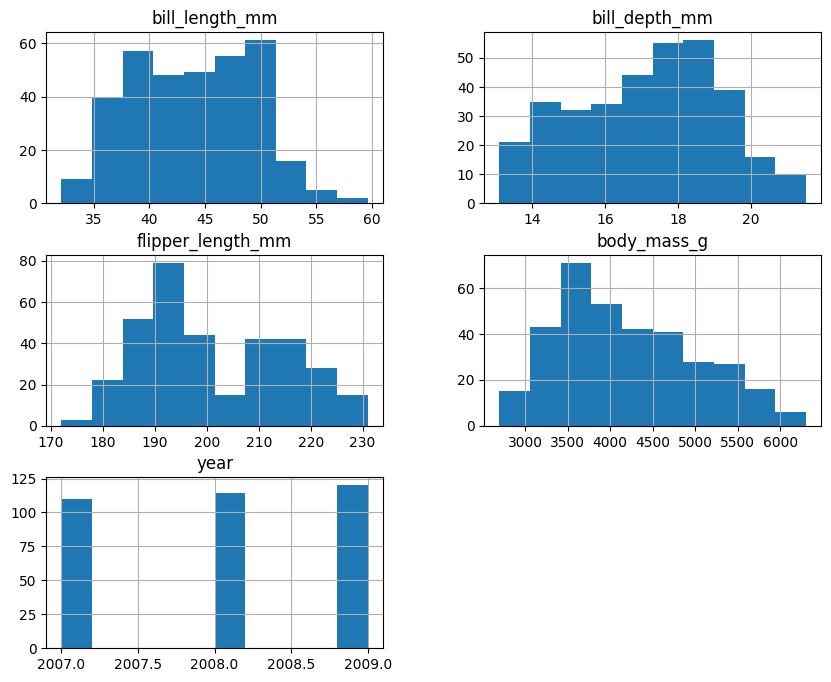

In [6]:
#Descriptive Statistics
print(df.describe())
for col in df.select_dtypes(include=['object']):
    print(f'\nUnique values for {col}: {df[col].unique()}')

for col in df.select_dtypes(include=['number']):
    print(f'\nRange for {col}: {df[col].min()} - {df[col].max()}')


df.hist(figsize=(10, 8))
plt.show()

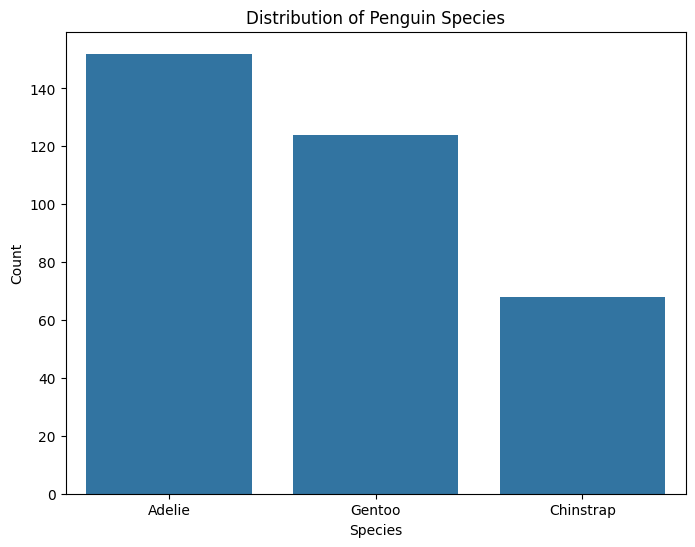

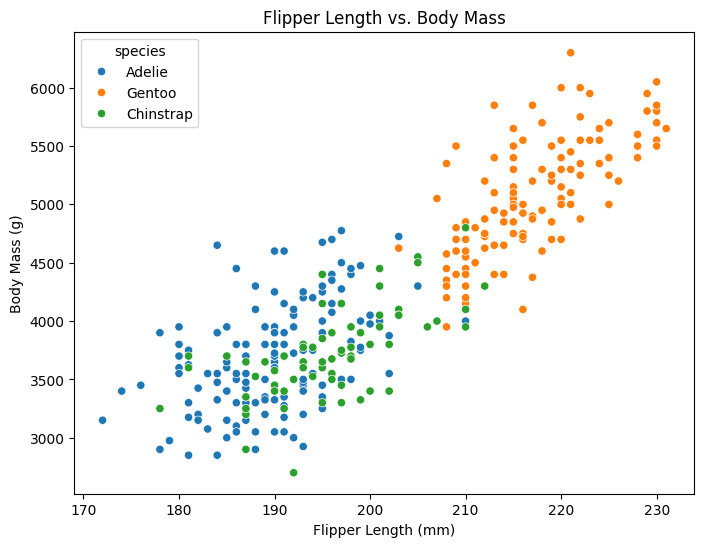

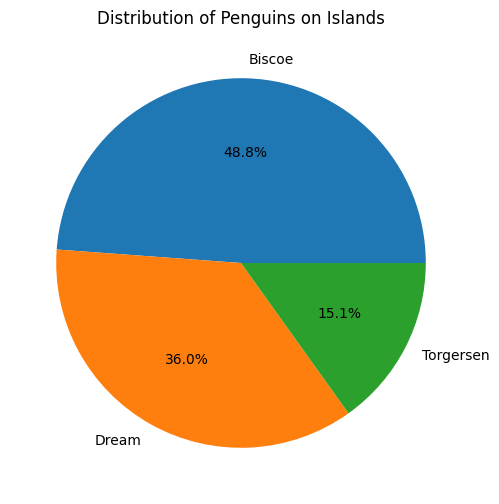

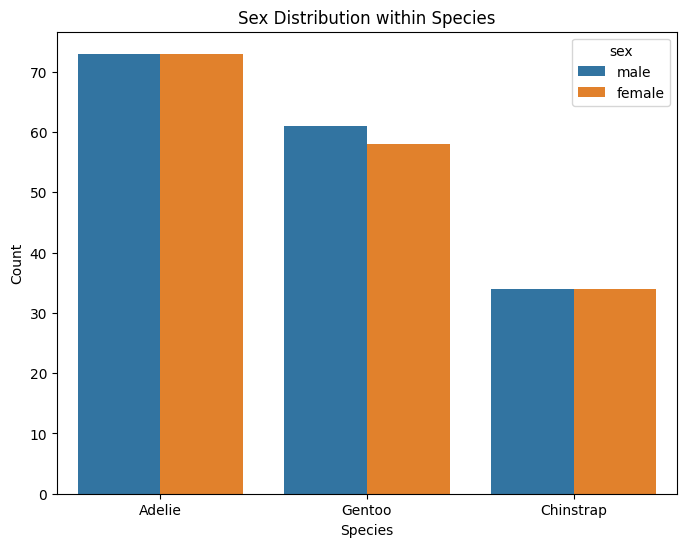

In [7]:
#Distributions

# --- Species Distribution ---
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df)
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# --- Flipper Length vs. Body Mass ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df)
plt.title('Flipper Length vs. Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

# --- Island Distribution ---
plt.figure(figsize=(8, 6))
df['island'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Penguins on Islands')
plt.ylabel('')
plt.show()

# --- Sex Distribution within Species ---
plt.figure(figsize=(8, 6))
sns.countplot(x='species', hue='sex', data=df)
plt.title('Sex Distribution within Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

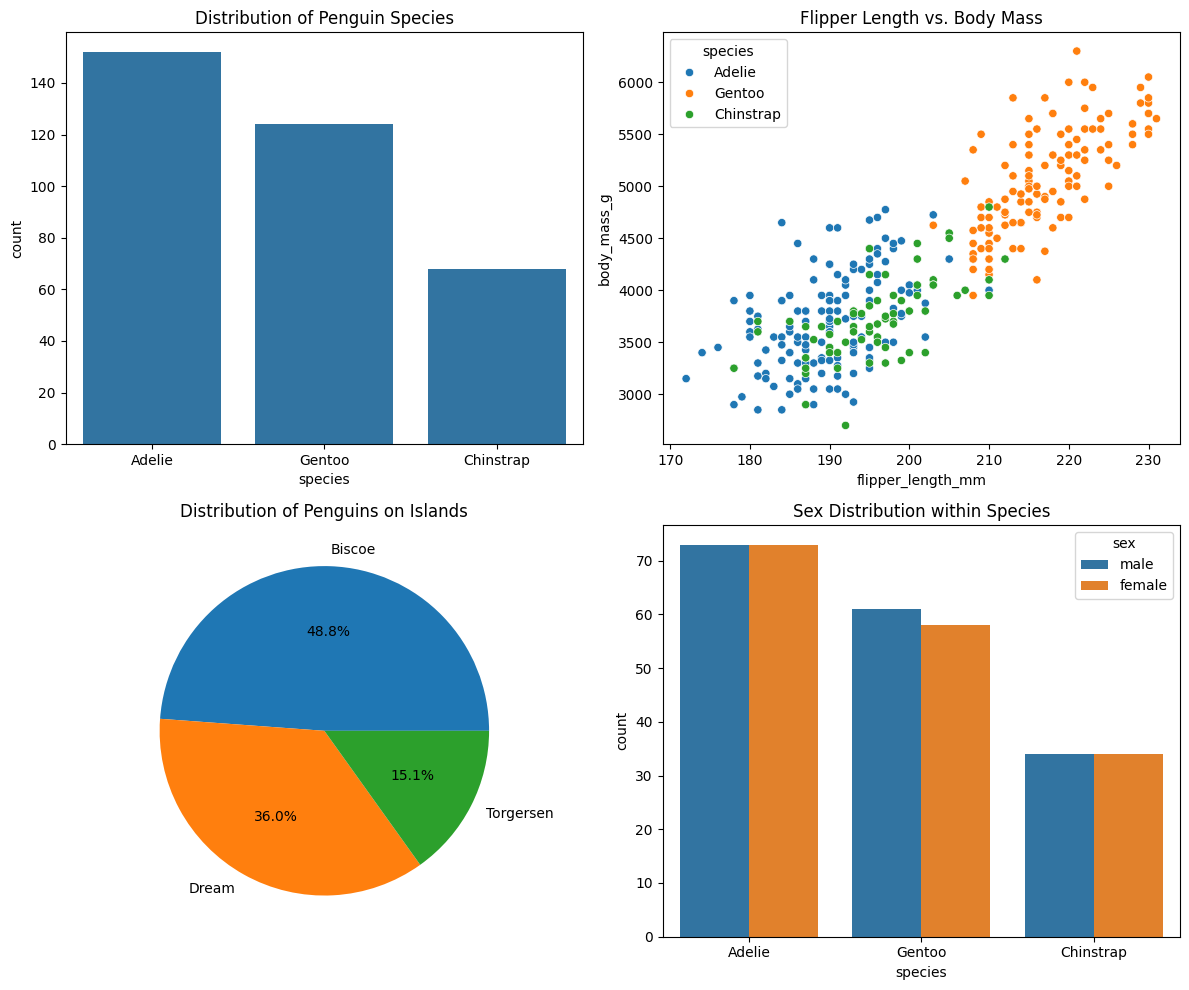

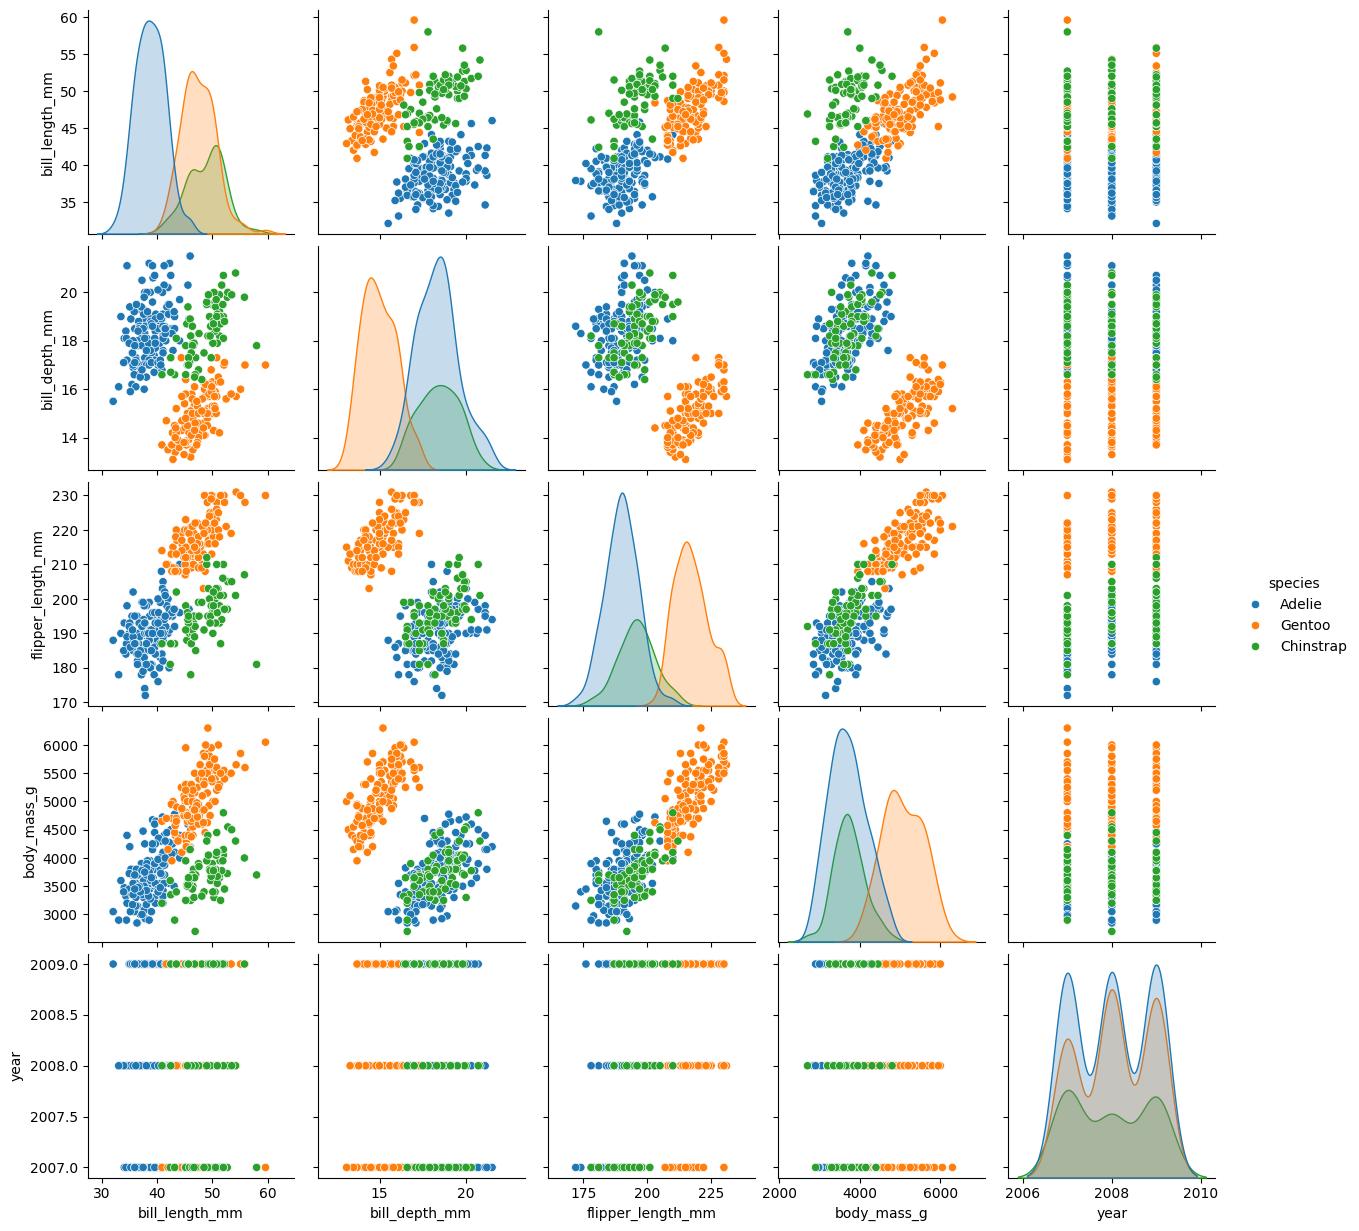

In [8]:
#Pairwise Visualizations


# --- Combine multiple plots into a single figure ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Species Distribution
sns.countplot(x='species', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Penguin Species')

# Flipper Length vs. Body Mass
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Flipper Length vs. Body Mass')

# Island Distribution
df['island'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Penguins on Islands')
axes[1, 0].set_ylabel('')

# Sex Distribution within Species
sns.countplot(x='species', hue='sex', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Sex Distribution within Species')

plt.tight_layout()
plt.show()

# --- Pairplot ---
sns.pairplot(df, hue='species')
plt.show()


Conclusions: Of the species observed, Adelie penguins, being the most prevalent species in the data set, followed by Gentoo and Chinstrap, the data shows the following distinctions.

Physical Characteristics: Gentoo penguins tend to have larger body masses and longer flipper lengths compared to the other species. There's a positive correlation between flipper length and body mass.

Habitat: Most penguins are found on Biscoe Island, followed by Dream and Torgersen Islands.

Sex: The sex distribution seems relatively balanced within each species, though there might be slight variations.

The pairplot confirms these observations and highlights correlations between different variables, such as bill length and depth, flipper length, and body mass.